# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 12 </span>
## <span style="color:orange"> Keras - Deep & Convolutional Neural Network image recognition </span>

In [76]:
#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True' #This is needed in my Anaconda+MacOsX installation; leave it commented.
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

In [77]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)


In [78]:
# Consider an array of 5 labels out of a set of 3 classes {0, 1, 2}:
labels = np.array([0, 2, 1, 2, 0])
# `to_categorical` converts this into a matrix with as many columns as there are classes.
# The number of rows stays the same.
keras.utils.to_categorical(labels)

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

X_train shape: (60000, 784)
X_test shape: (10000, 784)

an example of a data point with label 4


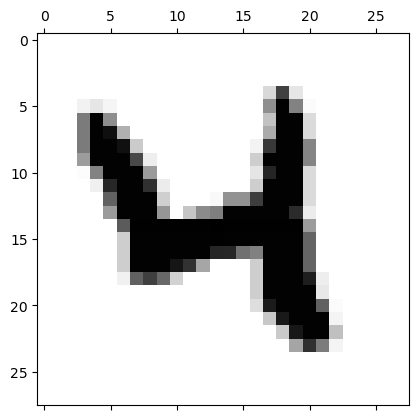

... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [79]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

In [80]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [81]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
################################################################################################

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Nadam(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [82]:
# training parameters
batch_size = 32
epochs = 50

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/50


/home/enrico/anaconda3/envs/tensorf/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.8581 - loss: 0.4738 - val_acc: 0.9637 - val_loss: 0.1136
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9624 - loss: 0.1348 - val_acc: 0.9739 - val_loss: 0.0833
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9717 - loss: 0.0950 - val_acc: 0.9728 - val_loss: 0.0914
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9786 - loss: 0.0743 - val_acc: 0.9763 - val_loss: 0.0897
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9818 - loss: 0.0589 - val_acc: 0.9795 - val_loss: 0.0799
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9843 - loss: 0.0495 - val_acc: 0.9770 - val_loss: 0.0934
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9869 - loss: 0.0426 - val_acc: 0.9778 - val_loss: 0.0917
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9877 - loss: 0.0388 - val_acc: 0.9815 - val_loss: 0.0909
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/st

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - acc: 0.9768 - loss: 0.3150

Test loss: 0.23712807893753052
Test accuracy: 0.9807999730110168


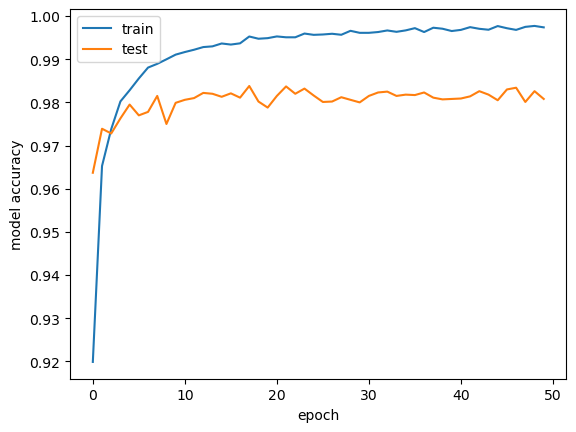

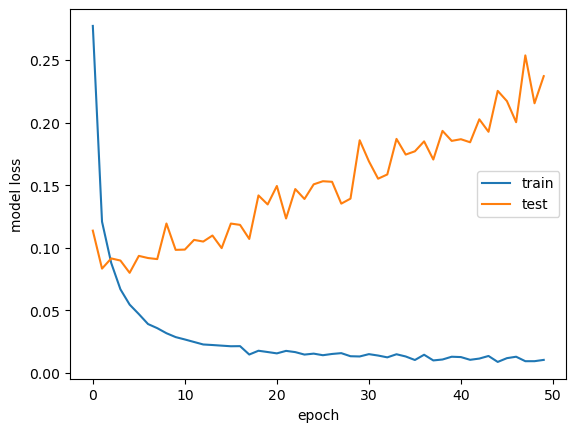

In [83]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# save on file output for different optimizer
OPT = "Nadam"
import pandas as pd
data = {
    'epoch': list(range(1, epochs + 1)),
    'loss': history.history['loss'],
    'val_loss': history.history['val_loss'],
    'acc': history.history['acc'],
    'val_acc': history.history['val_acc']
}
# Creazione di un DataFrame
df = pd.DataFrame(data)
#df.to_csv(f'optimizer/{OPT}.dat', index=False, sep = ' ')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step


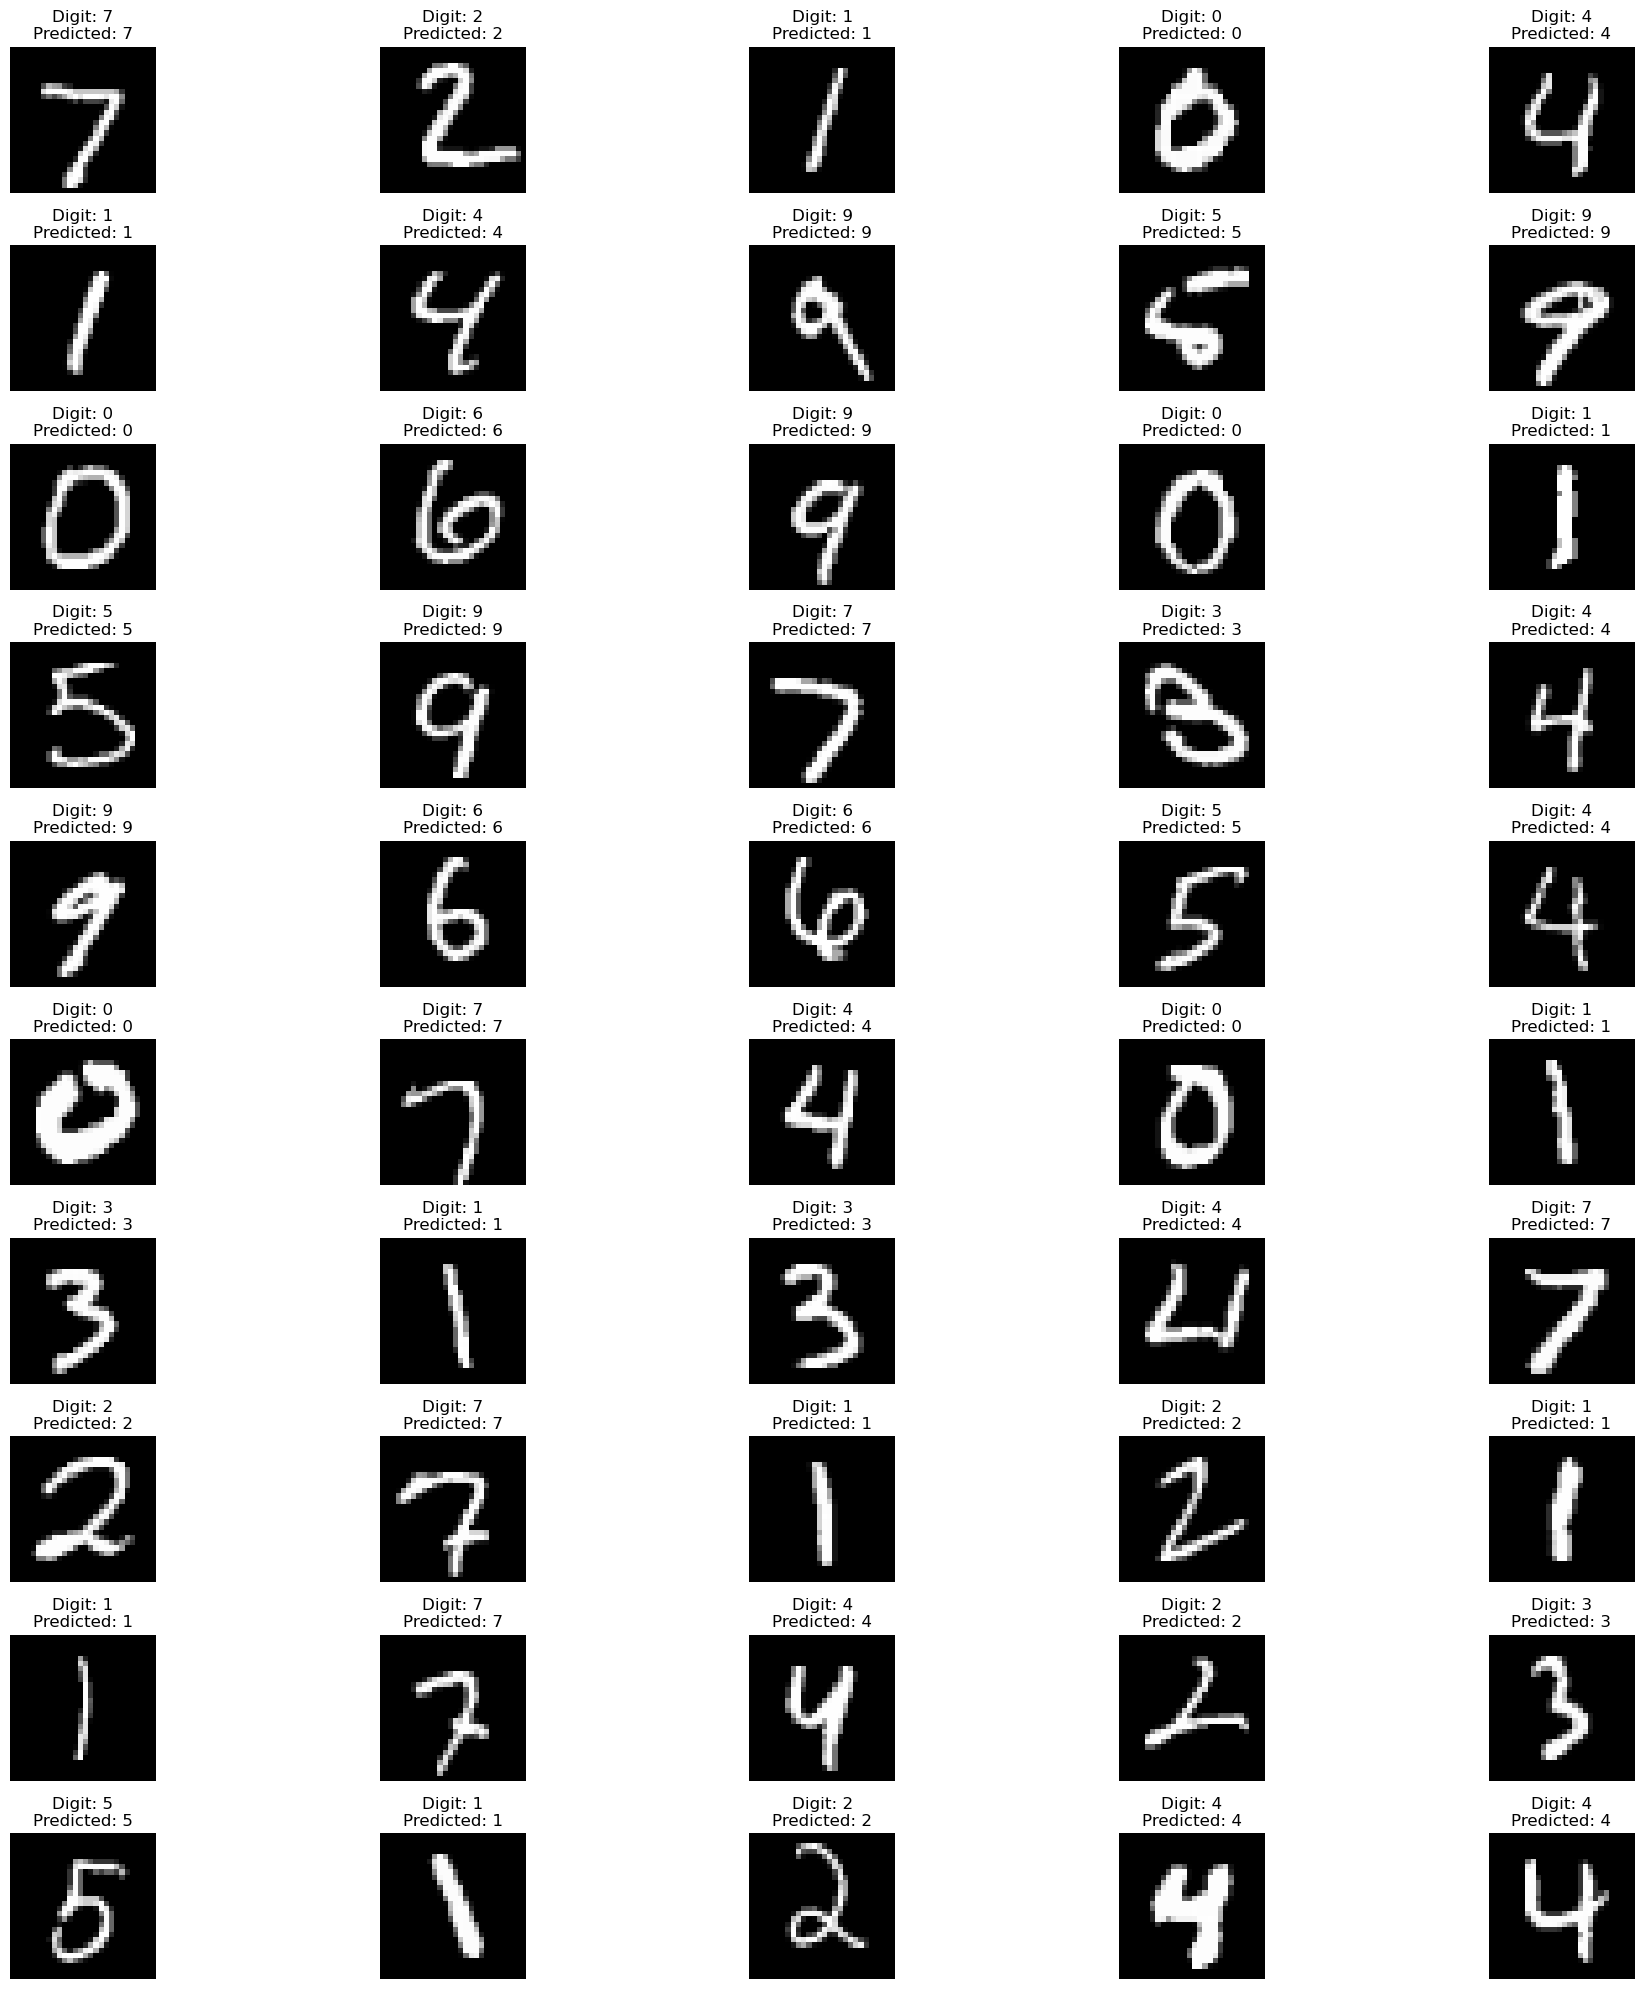

In [84]:
 X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

# Number of images to plot
num_images = 50
# Determine the grid size for plotting
num_rows = 10
num_cols = 5

# Plot the specified number of test images along with their true and predicted labels
plt.figure(figsize=(20, 20))
for i in range(num_images):
    ax = plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(X_test[i, :, :, 0], cmap='gray')
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))
    plt.axis('off')
plt.tight_layout()
plt.show()

### Exercise 12.1

<span style="color:red">Change at will and train your DNN by increasing the number of epochs to an adeuqate value</span>. Try to use at least two other optimizers, different from SGD: <span style="color:red">watch to accuracy and loss for training and validation data and comment on the performances</span>.

## Model Training Results: Accuracy and Loss with Different Optimizers. 
- **N_epoch**: 50

Processing optimizer/SGD.dat


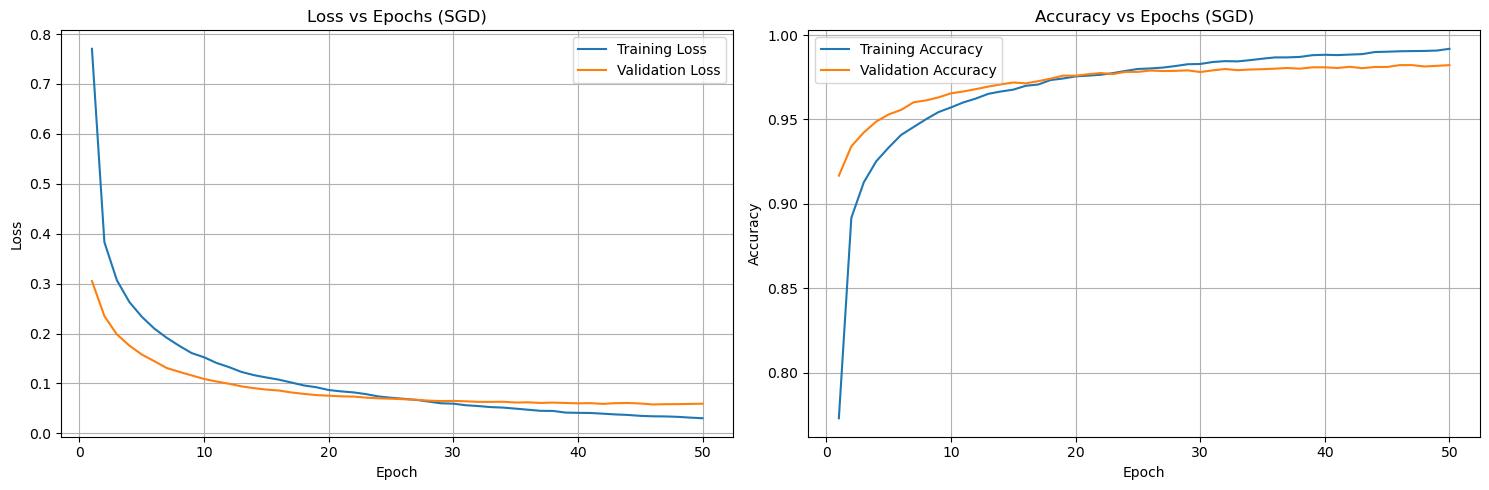

Processing optimizer/Adam.dat


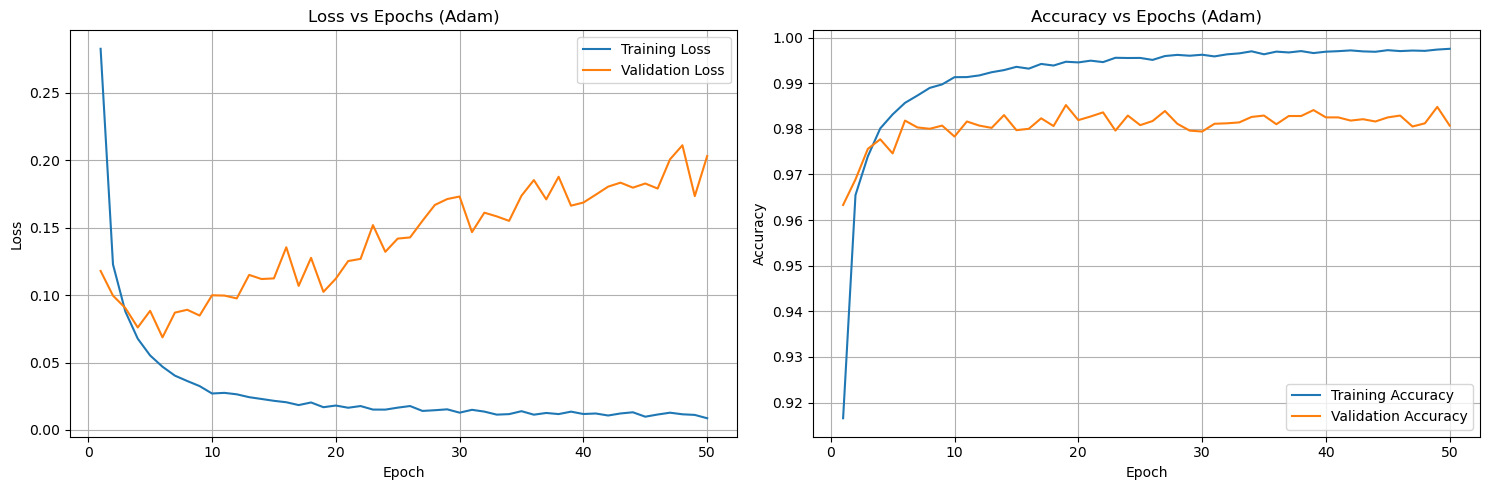

Processing optimizer/Adamax.dat


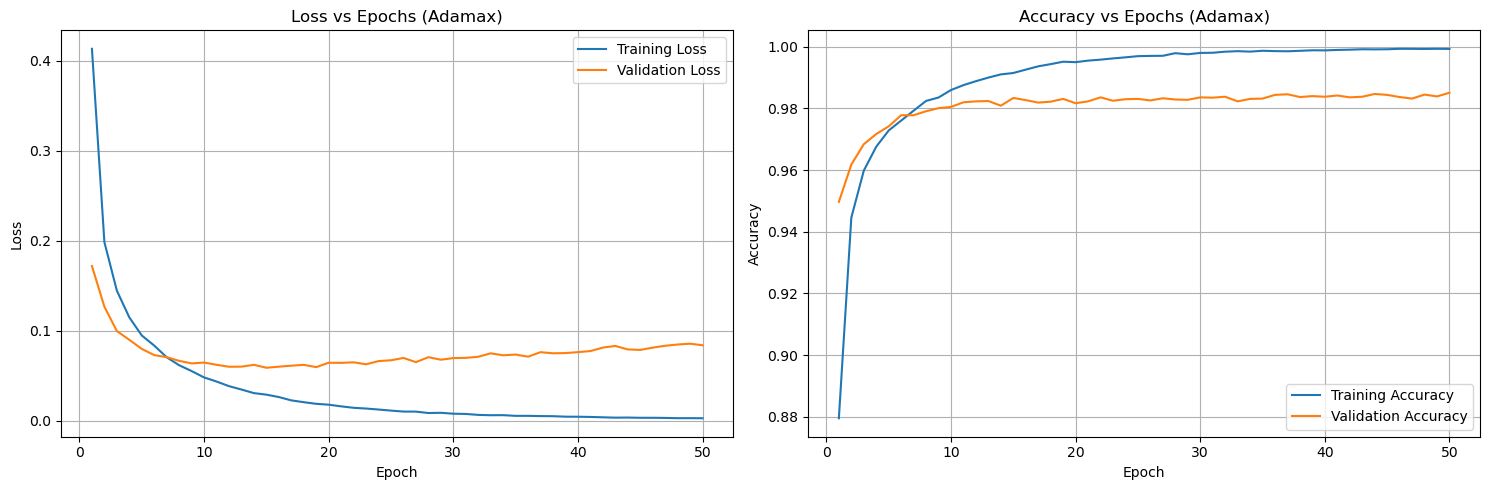

Processing optimizer/RMSprop.dat


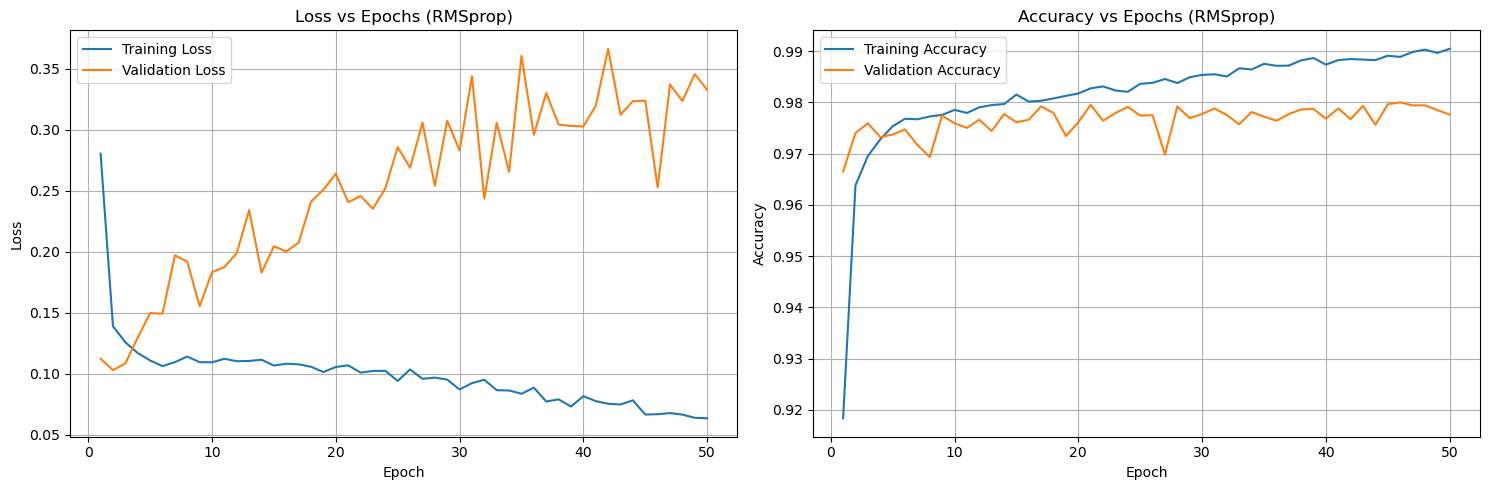

Processing optimizer/Adagrad.dat


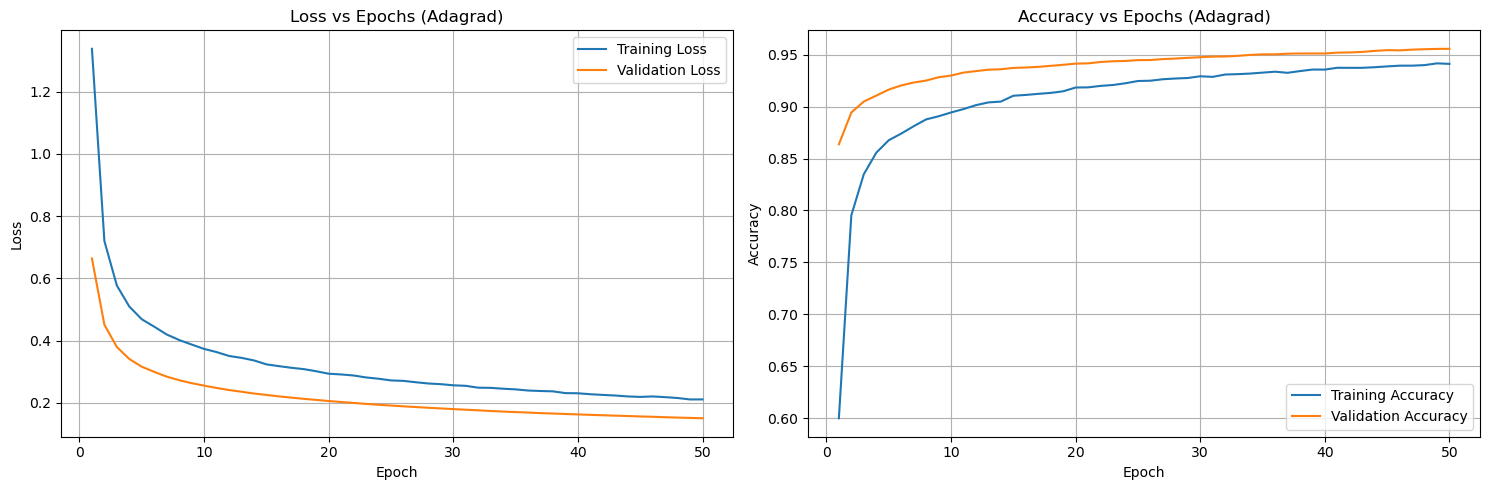

Processing optimizer/Nadam.dat


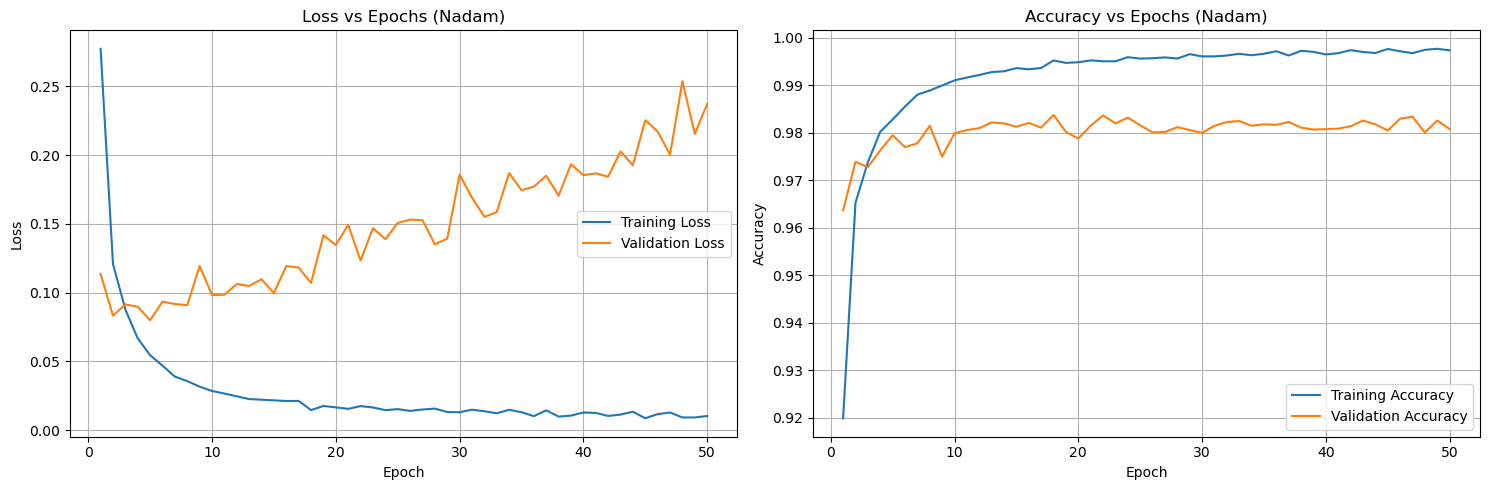

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Lista degli ottimizzatori
optimizers = ["SGD", "Adam", "Adamax", "RMSprop", "Adagrad", "Nadam"]

for optimizer in optimizers:
    filename = f"optimizer/{optimizer}.dat"

    data = pd.read_csv(filename, sep='\s+')
    print(f"Processing {filename}")

    # Creazione della figura con due subplot orizzontali
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Grafico per la loss
    axes[0].plot(data['epoch'], data['loss'], label='Training Loss')
    axes[0].plot(data['epoch'], data['val_loss'], label='Validation Loss')
    axes[0].set_title(f'Loss vs Epochs ({optimizer})')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].legend(loc='best')
    axes[0].grid(True)

    # Grafico per l'accuracy
    axes[1].plot(data['epoch'], data['acc'], label='Training Accuracy')
    axes[1].plot(data['epoch'], data['val_acc'], label='Validation Accuracy')
    axes[1].set_title(f'Accuracy vs Epochs ({optimizer})')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend(loc='best')
    axes[1].grid(True)

    # Mostrare la figura
    plt.tight_layout()
    plt.show()